# __Principal Component Analysis__

Principal Component Analysis (PCA) is a foundational unsupervised dimensionality reduction technique widely used in machine learning and data analysis to simplify large or complex datasets into a smaller datasets while still maintaining significant patterns of the original data. PCA is invaluable for visualization, noise reduction, feature engineering, and improving computational efficiency in models like SVM and neural networks.

- [What are Principal Components](#what)
- [How Does PCA Work?](#how)  
- [PCA with Scikit-Learn](#scikit-learn)
- [More PCA with Scikit-Learn](#more)

## What are Principal Components <a class="anchor" id="what"></a>

Principal Components (PCs) are the cornerstone of Principal Component Analysis (PCA). They are linear combinations of the original features in your dataset, designed to capture the most significant patterns and variations in the data. Think of them as new axes in a transformed space, where each axis (principal component) is aligned with the direction of maximum variance in the data. Each principal component is a weighted sum of the original features.



__Example: PCs in Action__

Suppose you have a dataset with features like height, weight, and age. PCA might produce:

PC1: A combination of height and weight (e.g., overall body size).  
PC2: A combination of age and weight (e.g., maturity level).  
PC3: A combination of height and age (e.g., growth rate).  

Each component simplifies the data while preserving its essential structure.

## How Does PCA Work? <a class="anchor" id="how"></a>

PCA follow these steps:  

1. Standardize the Data: PCA is affected by the scale of the data, so we need to standardize the features to have a mean of 0 and a standard deviation of 1.

2. Compute the Covariance Matrix: The covariance matrix helps us understand how the variables of the input data are varying from the mean with respect to each other.

3. Compute Eigenvalues and Eigenvectors: Eigenvalues and eigenvectors are computed from the covariance matrix. Eigenvectors represent the directions of the new feature space, and eigenvalues represent the magnitude of the variance in those directions.

4. Sort Eigenvalues and Eigenvectors: Sort the eigenvalues and their corresponding eigenvectors in descending order.

5. Select Principal Components: Choose the top k eigenvectors (principal components) that correspond to the largest eigenvalues.

6. Transform the Data: Project the original data onto the new feature space using the selected principal components.

Let's try to work out the steps from scratch below:

In [1]:
import numpy as np

# Step 1: Standardize the Data
def standardize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_std = (X - mean) / std
    return X_std, mean, std


# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(X_std):
    cov_matrix = np.cov(X_std.T)
    return cov_matrix


# Step 3: Compute Eigenvalues and Eigenvectors
def compute_eigen(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors


# Step 4: Sort Eigenvalues and Eigenvectors
def sort_eigen(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors


# Step 5: Select Principal Components
def select_principal_components(eigenvectors, k):
    return eigenvectors[:, :k]


# Step 6: Transform the Data
def transform_data(X_std, principal_components):
    return np.dot(X_std, principal_components)

Use the functions provided above to perform the PCA on the datasets below.

In [2]:
import pandas as pd
from sklearn.datasets import load_iris 

iris=load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

Work out the transformed data using PCA and store it under variable `X_pca`:

In [3]:
# Try out yourself!
X_scaled, mean, std = standardize_data(iris_df)

cov_matrix = compute_covariance_matrix(X_scaled)

eigenvalues, eigenvectors = compute_eigen(cov_matrix)

eigenvalues, eigenvectors = sort_eigen(eigenvalues, eigenvectors)

k = 2
principal_components = select_principal_components(eigenvectors, k)

X_pca = transform_data(X_scaled, principal_components)

> Click to reveal code

<!--
X_scaled, mean, std = standardize_data(iris_df)

cov_matrix = compute_covariance_matrix(X_scaled)

eigenvalues, eigenvectors = compute_eigen(cov_matrix)

eigenvalues, eigenvectors = sort_eigen(eigenvalues, eigenvectors)

k = 2
principal_components = select_principal_components(eigenvectors, k)

X_pca = transform_data(X_scaled, principal_components)
-->

#### Visualizations
Note: Complete the activity above before running the following code.

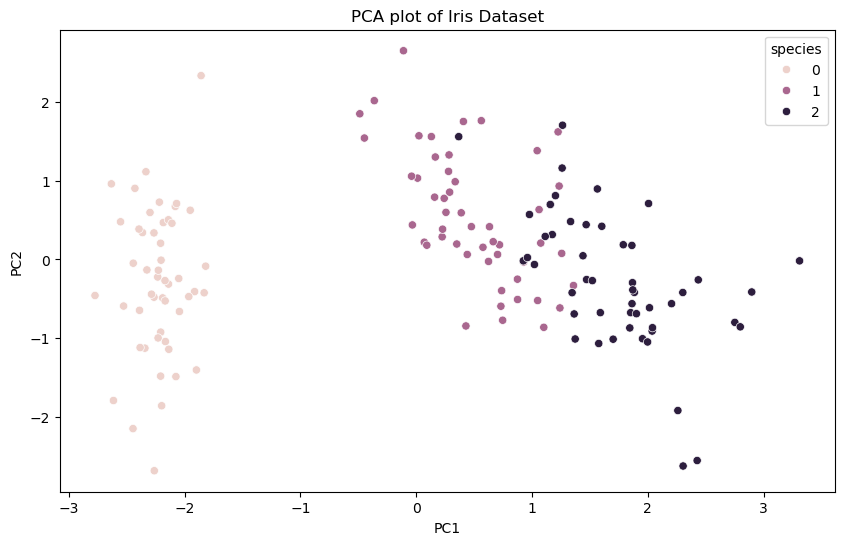

In [4]:
# Plot scatter plot using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

iris_target_df = pd.DataFrame(data=iris.target, columns=['species'])
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
X_pca_df = pd.concat([X_pca_df, iris_target_df], axis=1)

# set the size of the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=X_pca_df, hue='species')
plt.title('PCA plot of Iris Dataset')
plt.show()

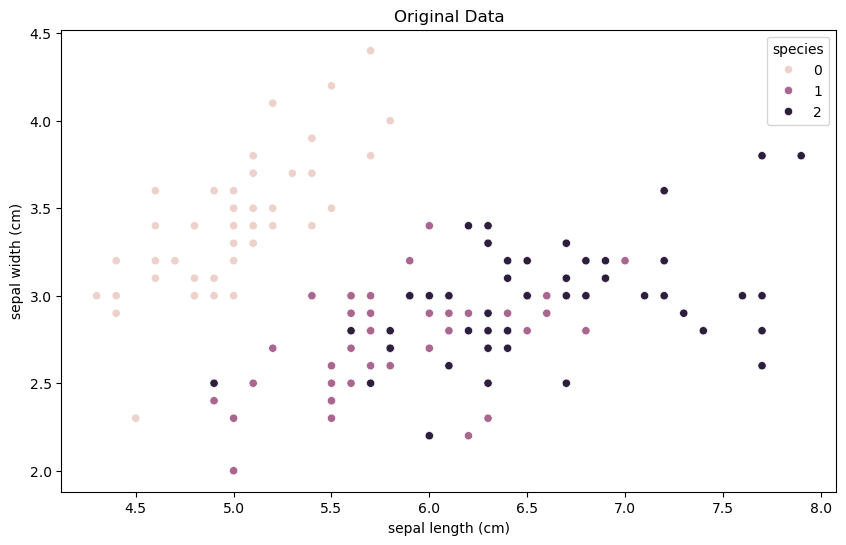

In [5]:
# plot the original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_df, hue=iris_target_df['species'])
plt.title('Original Data')
plt.show()

## <a id='scikit-learn'></a> PCA with Scikit-Learn

### 1. Import library and loading dataset

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [7]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

### 2. Data preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3. PCA

Perform dimensionality reduction on the scaled data. Subsequently, we will analyze the difference between the original and the PCA-transformed data.

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

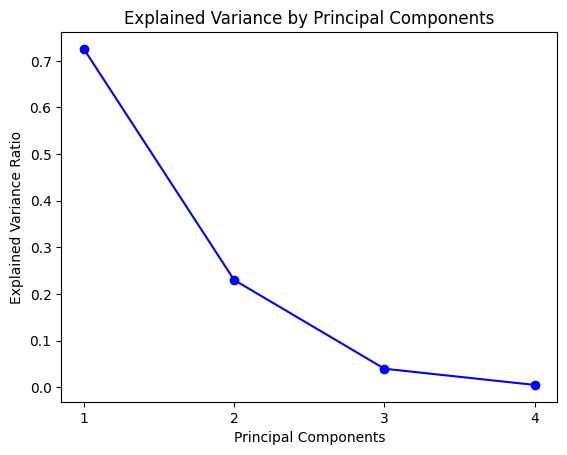

In [6]:
# Explained Variance Plot
plt.plot(range(1, 5), pca.explained_variance_ratio_, "bo-")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.xticks(range(1, 5))
plt.show()

From the plot above, you can see that the first principal component (PC1) explains by far the largest share of the variance (around 70%), with the second component (PC2) explaining the next biggest chunk, and so on.

In practical terms:
* __PC1 Dominates__: Most of the variability in the data is captured by the first principal component.
* __Diminishing Returns__: Subsequent components add progressively smaller amounts of explained variance. By the time you reach the third or fourth component, the incremental gain is relatively small.
* __Dimensionality Reduction__: You could potentially reduce the dataset to just two principal components and still capture the vast majority of the variance (e.g., the first two capture over 90% of the variance).

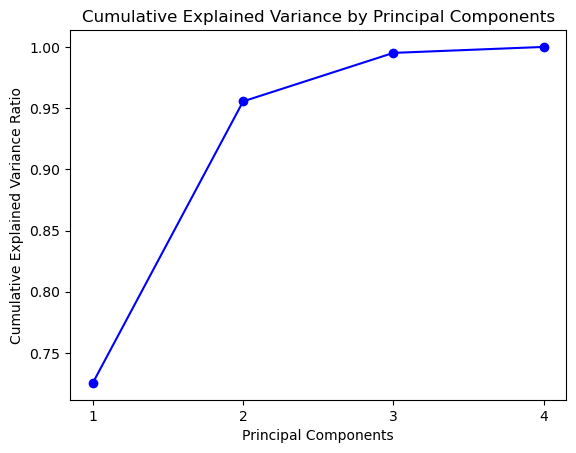

In [10]:
# Cumulative Explained Variance Plot
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_), "bo-")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance by Principal Components")
plt.xticks(range(1, 5))
plt.show()


Overall, the plot suggests that using a small number of principal components might be sufficient to capture most of the information in the dataset.

In [11]:
pca.explained_variance_

array([2.92644395, 0.92776828, 0.15976229, 0.01963892])

In [12]:
pca.explained_variance_ratio_

array([0.72551423, 0.23000922, 0.03960774, 0.00486882])

Visualizes the PCA-transformed training data in a 2D scatter plot together with the original data to see the difference, with points colored according to their class labels.

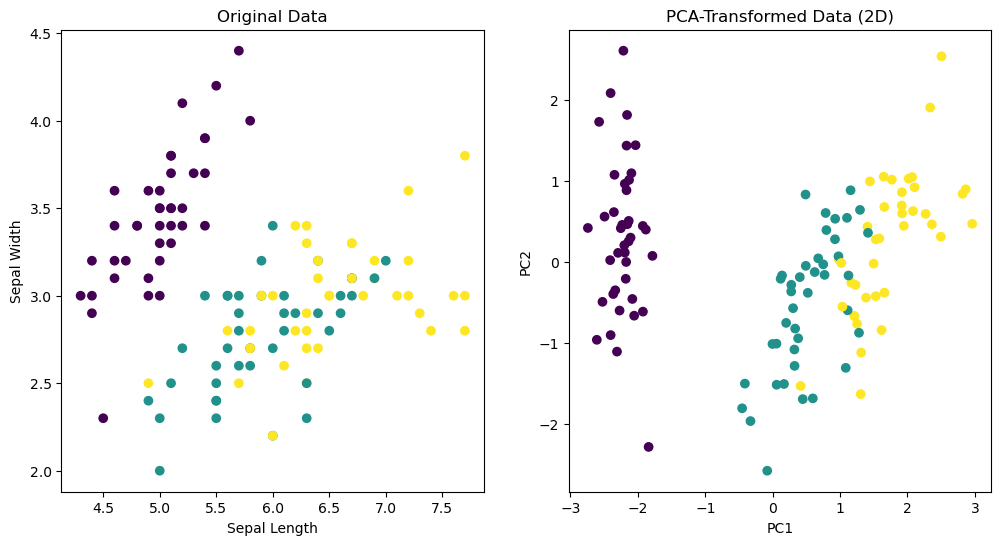

In [13]:
# 2D PCA Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(X_train["sepal length (cm)"], X_train["sepal width (cm)"], c=y_train, cmap="viridis")
axs[0].set_xlabel("Sepal Length")
axs[0].set_ylabel("Sepal Width")
axs[0].set_title("Original Data")
axs[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="viridis")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")
axs[1].set_title("PCA-Transformed Data (2D)")
plt.show()

From these two plots—one in the original feature space (Sepal Length vs. Sepal Width) and one in the 2D PCA-transformed space (PC1 vs. PC2) — we can draw several key observations:

* Clusters in the Original Space:
In the left plot (original data), we can see three color-coded groups that do show some separation based on Sepal Length and Sepal Width, but there is also some overlap.

* Clusters in the PCA Space:
In the right plot (after projecting onto the first two principal components), the three groups are still reasonably separated, sometimes even more distinctly than in the original space.
This indicates that the first two principal components capture much of the variance that differentiates these groups.

* Preservation of Structure:
PCA has effectively reduced the dimensionality (potentially from 4D to 2D) while still preserving the overall cluster structure.
The separation is not perfect, but the fact that the groups remain fairly distinct suggests that most of the important information for distinguishing them lies along these principal components.

* Dimensionality Reduction Benefit:
By using just two dimensions (PC1 and PC2), you can visualize and analyze the main patterns in the data without losing too much of the “separation” power that the original features provided.
This can be especially helpful for exploratory data analysis or for visualizing complex datasets in lower dimensions.

In short, the PCA-transformed plot shows that the first two principal components provide a good 2D representation of the data, preserving the main cluster structure and demonstrating that much of the variance that distinguishes the groups can be captured with just two new axes.

### 4. Model training and evaluation

We will train a logistic regression model on:
- The original dataset (without PCA)
- The PCA-transformed dataset

And compare the performance of the two models using the accuracy metrics.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
# Without PCA
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy (Without PCA):", accuracy_score(y_test, y_pred))

Accuracy (Without PCA): 1.0


In [13]:
# With PCA
model_pca = LogisticRegression(random_state=42)
model_pca.fit(X_train_pca[:, :2], y_train)  # Use first 2 components
y_pred_pca = model_pca.predict(X_test_pca[:, :2])
print("Accuracy (With PCA):", accuracy_score(y_test, y_pred_pca))

Accuracy (With PCA): 0.9


Notice the loss of accuracy on the model trained with the PCA-transformed dataset (0.9) compared to the model without the PCA (1.0).

This is possible due to:
- __Loss of critical information:__  
  PCA reduces dimensionality by discarding components with low variance. While these components may explain less variance, they might still contain subtle patterns that are useful for classification.
- __Number of Componenets:__  
  If too few components are retained , the model might lose critical information. Experiment with different numbers of components to see how it affects performance.
- __Dataset Characteristics:__  
  PCA is more beneficial for high-dimensional datasets (e.g., with hundreds or thousands of features) where dimensionality reduction is critical for computational efficiency and noise reduction. Furthermore, if the dataset is already well structured and clean, PCA may discard useful information.


In our case on the Iris dataset, where the model trained on the original data achieved perfect accuracy (1.0), while the PCA-based model achieved slightly lower accuracy (0.9). This is likely because the original features in the Iris dataset are already highly informative, and reducing dimensionality with PCA discarded some useful information. PCA is not always about improving accuracy but about balancing accuracy, interpretability, and computational efficiency.

## <a id='more'></a> More PCA with Scikit-Learn

### 1. Handwritten Digits Dataset

Let's us experiment on more datasets. The next one we will use is the handwritten digits dataset from sklearn library.

The handwritten digits dataset in scikit-learn is a small, classic dataset often used for demonstrating classification and dimensionality reduction techniques. It contains images of handwritten digits (0 through 9), each represented as an 8×8 grayscale image (i.e., 64 features). There are 1,797 total images in the dataset, making it a manageable size for quick experiments. Because the digits are fairly distinct yet still have subtle variations, this dataset serves as a great starting point for illustrating pattern recognition, clustering, and classification methods.

Refer here for more info: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [14]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target # target variable (classes label: 0-9)

In [24]:
X.shape

(1797, 64)

Each image (8x8 pixel) is flattened into a vector of 64 numbers hence we have 64 features columns in the shape.

Visualize the dataset in 8x8 pixel images for digits 0 to 9 to have a look at their original image.

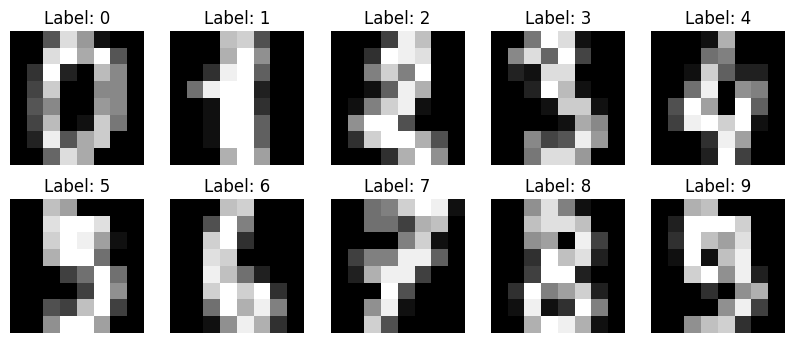

In [23]:
# plot the digits function
def plot_digits(X, y, n=10, pixel_size=8):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        ax = plt.subplot(2, n//2, i+1)
        ax.imshow(X[i].reshape(pixel_size, pixel_size), cmap="gray")
        ax.set_title(f"Label: {y[i]}")
        ax.axis('off')
    plt.show()

plot_digits(X, y)

Next, reduce the features from 64 to only 2 to see if they are still able to separate the digits into clusters.

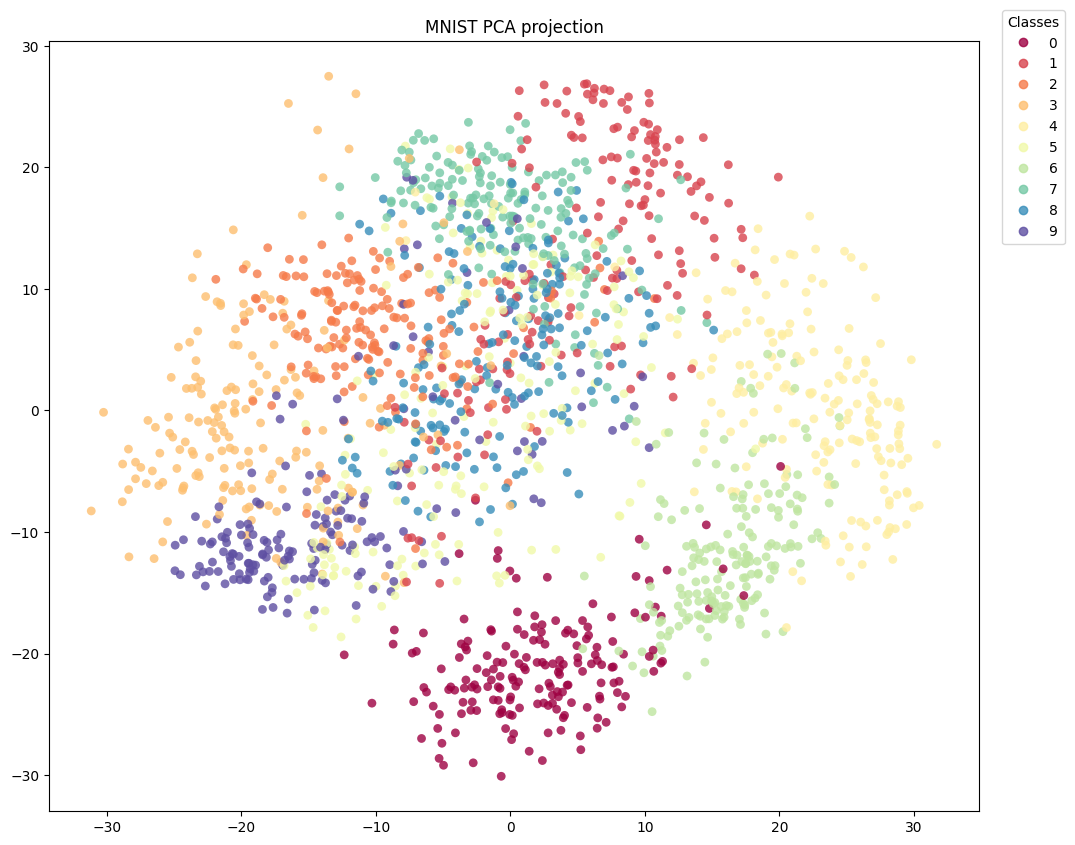

In [ ]:
pca_n2 = PCA(n_components=2)
X_pca = pca_n2.fit_transform(X)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    edgecolor="none",
    alpha=0.8,
    s=40,
    cmap=plt.get_cmap("Spectral", 10)
)

plt.legend(
    *scatter.legend_elements(),
    title="Classes",
    loc="upper right",
    bbox_to_anchor=(1.1, 1.05)
)
plt.title("MNIST PCA projection");

Looking at the plot, we can observed that even with just 2 dimensions, we can still see that the digits tends to go along in clusters although there are clearly overlapping clusters or points.

In practice, we would select enough principal components to capture 90% or more of the original variance. So, let's check how many components would make up 90% or more of the variance.

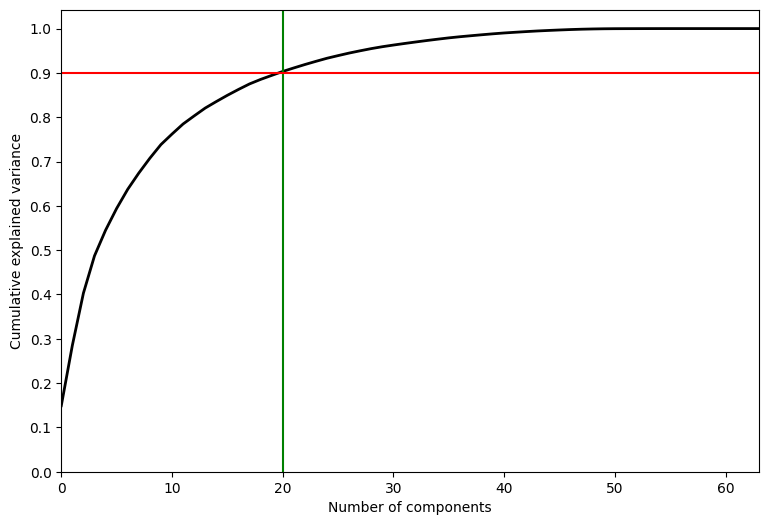

In [34]:
pca = PCA().fit(X)

plt.figure(figsize=(9, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="k", lw=2)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(20, c="g")
plt.axhline(0.9, c="r")
plt.show()

The first 20 components already consist around 90% of variance. But in order to later visualize it as a square image, we will take the first 25 components to visualize it in 5x5 pixels.

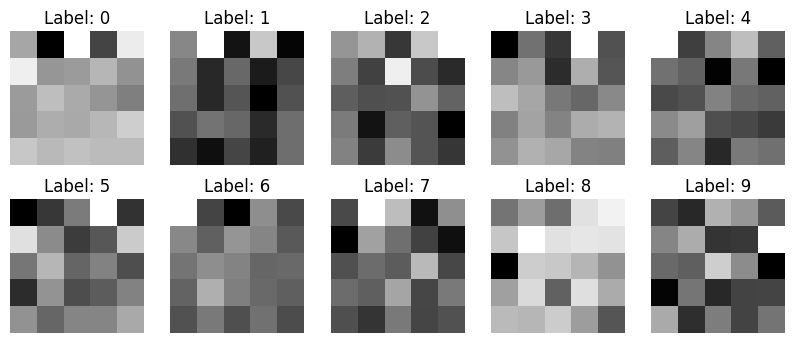

In [35]:
# perform PCA with 25 components
pca_n25 = PCA(n_components=25)
X_pca_n25 = pca_n25.fit_transform(X)

plot_digits(X_pca_n25, y, pixel_size=5)

At 25 components PCA, it is clearly difficult for us human to tell apart the different labels of the image. But for machines, it is a different story.

Let's train a simple decision tree model on both original and PCA-reduced data to observe the performance of the model.

In [ ]:
# train Decision Tree model on both original and PCA-reduced data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split, train and evaluate the original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy on original data:", accuracy_score(y_test, y_pred))

# Split, train and evaluate the PCA-reduced data using the same indices
X_pca_n25_train, X_pca_n25_test = train_test_split(X_pca_n25, test_size=0.8, random_state=42)
clf_pca = DecisionTreeClassifier(random_state=0)
clf_pca.fit(X_pca_n25_train, y_train)
y_pred_pca = clf_pca.predict(X_pca_n25_test)
print("Accuracy on PCA-reduced data:", accuracy_score(y_test, y_pred_pca))

Accuracy on original data: 0.7267037552155772
Accuracy on PCA-reduced data: 0.7343532684283728


Both models perform similarly, with the PCA-reduced data yielding a slightly higher accuracy (~73.44% vs. ~72.67%). This suggests that:

* The PCA transformation retains most of the crucial information needed for the decision tree to classify the digits.
* Reducing the number of features may help eliminate some noise or redundant information, potentially leading to a minor performance boost.
* Using fewer features can also simplify the model, which may benefit computational efficiency without sacrificing accuracy.

### 2. Arcene Dataset

Let's try on another dataset with more features. This time focusing on the time performance of training on both original and PCA-reduced dataset.

For this, we will work with the Arcene Dataset (from the UCI Machine Learning Repository but downloading from OpenML repository). This dataset contains about 10000 features, most of which are irrelevant noise.

In [47]:
from sklearn.datasets import fetch_openml

# Load the Arcene dataset from OpenML
# - OpenML is a public repository for machine learning data and experiments.
# - `fetch_openml` retrieves datasets by name or ID.
# - `name='arcene'` specifies the dataset name.
# - `version=1` ensures we load the first version of the dataset.
# - `parser='auto'` lets pandas parse the data into a DataFrame (if possible).
arcene = fetch_openml(name="arcene", version=1, parser="auto")
X, y = arcene.data, arcene.target

In [62]:
X_train, X_test = arcene.data[:100], arcene.data[100:]
y_train, y_test = arcene.target[:100], arcene.target[100:]

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# import perf_counter to measure time
from time import perf_counter

In [64]:
# Without PCA
t1_start = perf_counter()
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train_scaled, y_train)
t1_stop = perf_counter()
print(f"Training time (Without PCA): {t1_stop - t1_start:.2f} seconds")

y_pred = model.predict(X_test_scaled)
print(f"Accuracy (Without PCA): {accuracy_score(y_test, y_pred):.2f}")

Training time (Without PCA): 0.65 seconds
Accuracy (Without PCA): 0.82


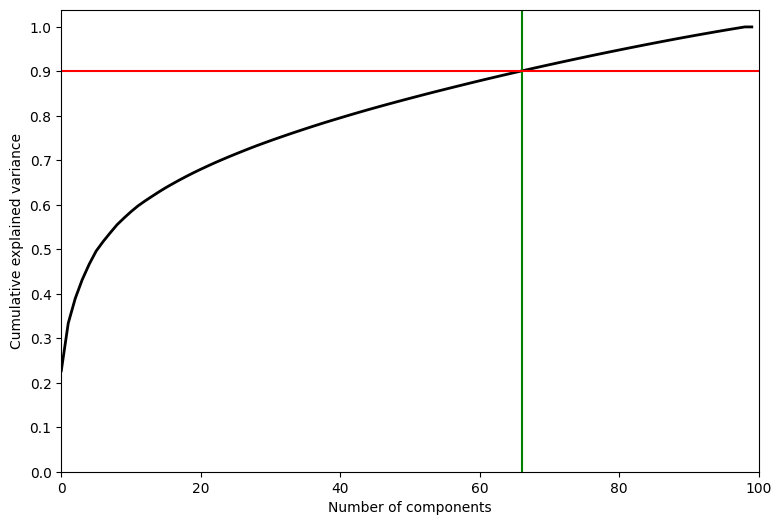

In [69]:
pca = PCA()
pca.fit_transform(X_train_scaled)

# cumulative explained variance
plt.figure(figsize=(9, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="k", lw=2)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(66, c="g")
plt.axhline(0.9, c="r")
plt.show()

In [70]:
pca_n67 = PCA(n_components=67)  # Retain top 67 components
X_train_pca = pca_n67.fit_transform(X_train_scaled)
X_test_pca = pca_n67.transform(X_test_scaled)

In [71]:
# With PCA
t2_start = perf_counter()
model_pca = LogisticRegression(max_iter=1000, random_state=0)
model_pca.fit(X_train_pca, y_train)
t2_stop = perf_counter()
print(f"Training time (With PCA): {t2_stop - t2_start:.2f} seconds")

y_pred_pca = model_pca.predict(X_test_pca)
print(f"Accuracy (With PCA): {accuracy_score(y_test, y_pred_pca):.2f}")

Training time (With PCA): 0.01 seconds
Accuracy (With PCA): 0.86


What do you observe with the results above?